<a href="https://colab.research.google.com/github/mohcenaouadj/House-Pricing-Prediction-Case-Ames/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
! pip install kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [6]:
! kaggle competitions download House-Prices-Advanced-Regression-Techniques

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.7/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.7/site-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [7]:
! unzip House-Prices-Advanced-Regression-Techniques.zip

unzip:  cannot find or open House-Prices-Advanced-Regression-Techniques.zip, House-Prices-Advanced-Regression-Techniques.zip.zip or House-Prices-Advanced-Regression-Techniques.zip.ZIP.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Data Exploratory

In [9]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col = 0)
test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col = 0)

In [10]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
print(f' Train set is : {train.shape}')
print(f' Test set is : {test.shape}')

 Train set is : (1460, 80)
 Test set is : (1459, 79)


<AxesSubplot:>

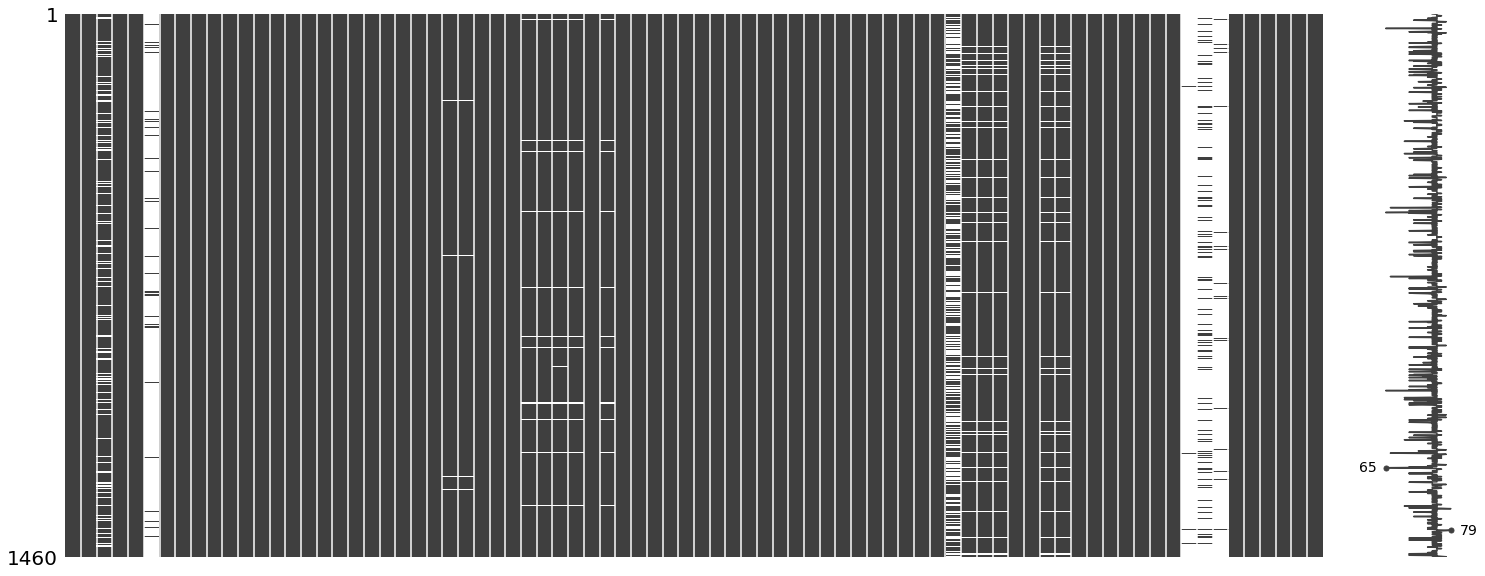

In [13]:
# Missing Values 

msno.matrix(train)

<AxesSubplot:>

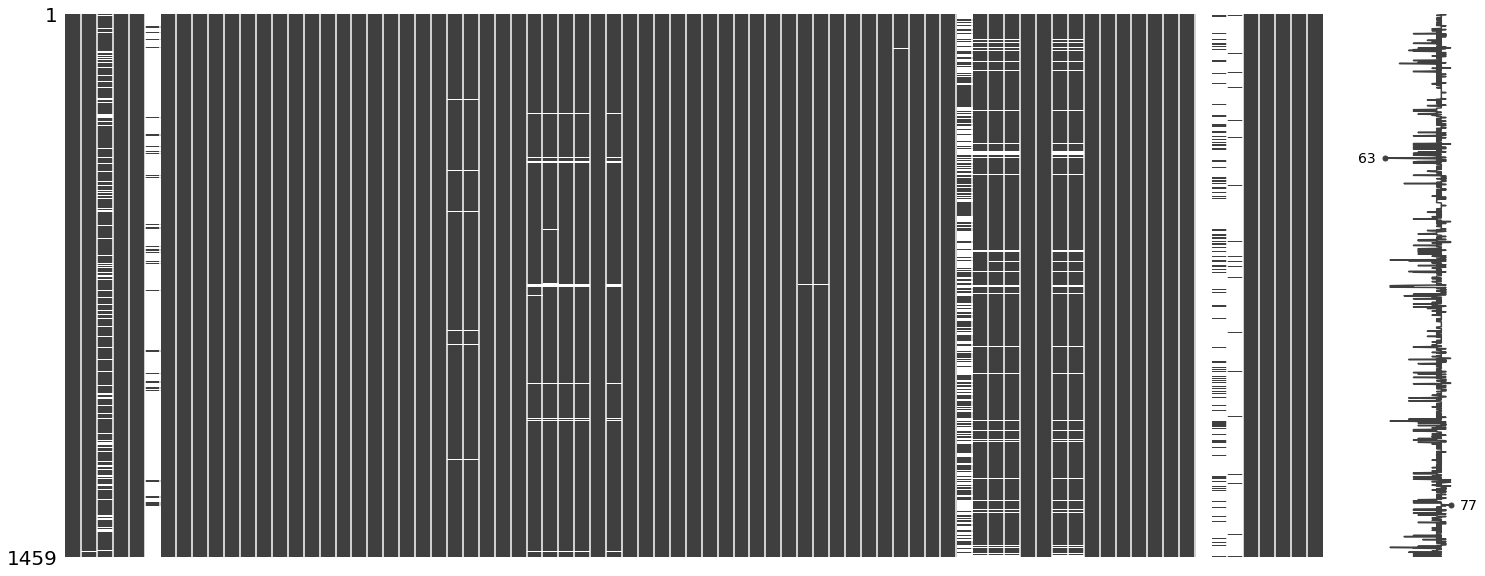

In [14]:
msno.matrix(test)

Both data sets has similarity in missing values possitions, so cleaning them can be easier if we just concatenate them.
Before we start the cleaning we can explore the data values in each column 

## Data Cleaning

In [15]:
data = pd.concat([train, test])
data = data.drop(columns = ['SalePrice'])

### Object type variables 

In [16]:
data['Functional'] = data['Functional'].fillna('Typ') 
data['Utilities'] = data['Utilities'].fillna('AllPub') 
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0]) 
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['KitchenQual'] = data['KitchenQual'].fillna("TA") 
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])
data['Electrical'] = data['Electrical'].fillna("SBrkr") 

Basement and garage has each 4 columns, we can try to find a way in order to consolidating them into just 2 columns, basement and garage 


Text(0.5, 1.0, 'Garage quality histogram')

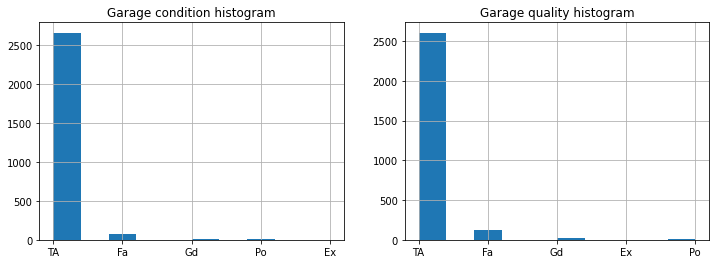

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
data['GarageCond'].hist()
plt.title('Garage condition histogram')
plt.subplot(1,2,2)
data['GarageQual'].hist()
plt.title('Garage quality histogram')

From both histograms we can be clear that the data is almost considered duplicated and for that we can just drop one of these columns

In [18]:
data = data.drop(columns = ['GarageCond'])

<AxesSubplot:>

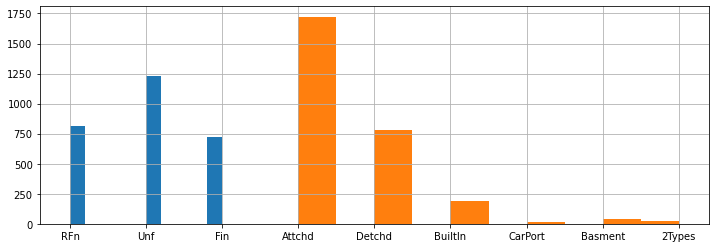

In [19]:
plt.figure(figsize=(12,4))
data['GarageFinish'].hist()
data['GarageType'].hist()

RFn : Roughly Finished  
Unf : Unfinished  
Fin : Finished  
Attchd : Attached garage  
Detchd : Dettached garage

In [20]:
data['GarageType'] = data['GarageType'].fillna(value = 'NA')
data['GarageFinish'] = data['GarageFinish'].fillna(value = 'NA')

<AxesSubplot:>

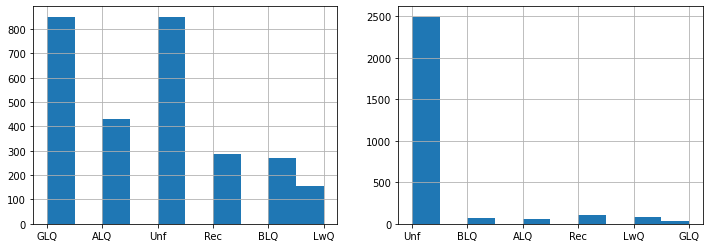

In [21]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
data['BsmtFinType1'].hist()
plt.subplot(1,2,2)
data['BsmtFinType2'].hist()

In [22]:
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(value = 'NA')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(value = 'NA')

In the description file, the basements varie from good living to unfinished, and the last value 'NA' is for 'no basement', so it's better to fill the nan values with 'NA' as 'No basement'.

<AxesSubplot:>

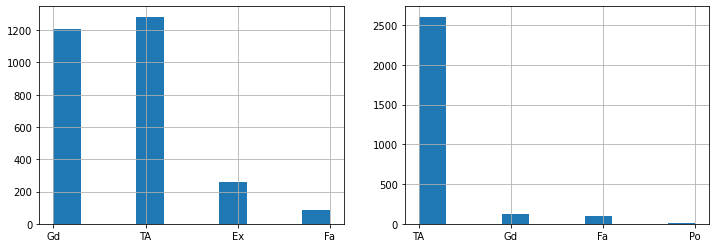

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
data['BsmtQual'].hist()
plt.subplot(1,2,2)
data['BsmtCond'].hist()

In [24]:
cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual', 
        'FireplaceQu', 'GarageQual', 'PoolQC']

for i in cols :
  print(f'{i} has {data[i].isna().sum()} nan values')

ExterQual has 0 nan values
ExterCond has 0 nan values
BsmtQual has 81 nan values
BsmtCond has 82 nan values
HeatingQC has 0 nan values
KitchenQual has 0 nan values
FireplaceQu has 1420 nan values
GarageQual has 159 nan values
PoolQC has 2909 nan values


In [25]:
data['BsmtQual'] = data['BsmtQual'].fillna(value = 'NA')
data['BsmtCond'] = data['BsmtCond'].fillna(value = 'NA')
data['GarageQual'] = data['GarageQual'].fillna(value = 'NA')
data['PoolQC'] = data['PoolQC'].fillna(value = 'NA')
data['FireplaceQu'] = data['FireplaceQu'].fillna(value = 'NA')
data['BsmtExposure'] = data['BsmtExposure'].fillna(value = 'NA')
data['Fence'] = data['Fence'].fillna(value = 'NA')
data['MiscFeature'] = data['MiscFeature'].fillna(value = 'NA')
data['Alley'] = data['Alley'].fillna(value = 'NA')
data['MSZoning'] = data['MSZoning'].fillna(value = 'C (all)')
data['MasVnrType'] = data['MasVnrType'].fillna(value = 'None')
data['MasVnrType'] = data['MasVnrType'].replace(['None'], 'NA')

In [26]:
objects = data.loc[:, data.dtypes == 'object'].isna().sum()
ints = data.loc[:, data.dtypes == 'int64'].isna().sum()
floats = data.loc[:, data.dtypes == 'float64'].isna().sum()

In [27]:
objects

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

### Float type variables

In [28]:
f = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for i in f:
  data[i] = data[i].fillna(value = float(data[i].mean()))

In [29]:
data['GarageCars'] = data['GarageCars'].fillna(value = float(0))
data['GarageArea'] = data['GarageArea'].fillna(value = float(data['GarageArea'].mean()))
data['MasVnrArea'] = data['MasVnrArea'].fillna(value = float(data['MasVnrArea'].mean()))
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(value = float(round(data['GarageYrBlt'].mean())))
data['LotFrontage'] = data['LotFrontage'].fillna(value = float(round(data['LotFrontage'].mean())))

In [30]:
data.loc[:, data.dtypes == 'float64'].isna().sum()

LotFrontage     0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
GarageCars      0
GarageArea      0
dtype: int64

<AxesSubplot:>

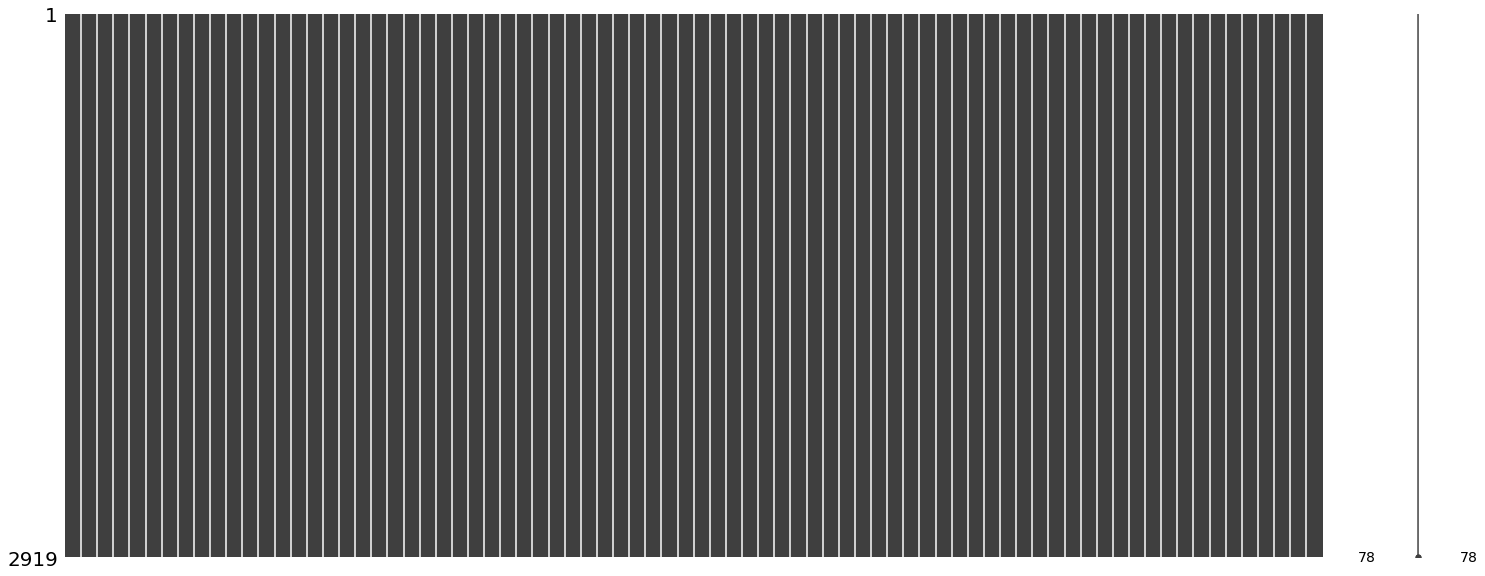

In [31]:
msno.matrix(data)

In [32]:
data.to_csv("data_clean.csv")

## Pair-wise Correlations

The purpose of this section is to identify the predictor variables that have strong effect on the target variable, as well as each other in case of multicollinearity.

In [33]:
df_train = data.iloc[0:1460, :]
df_test = data.iloc[1460:,:]

In [34]:
df_train = pd.concat([df_train, train['SalePrice']], axis = 1)

In [35]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Text(0.5, 1.0, 'Correlation Matrix: Ames Housing Data Set Variables ')

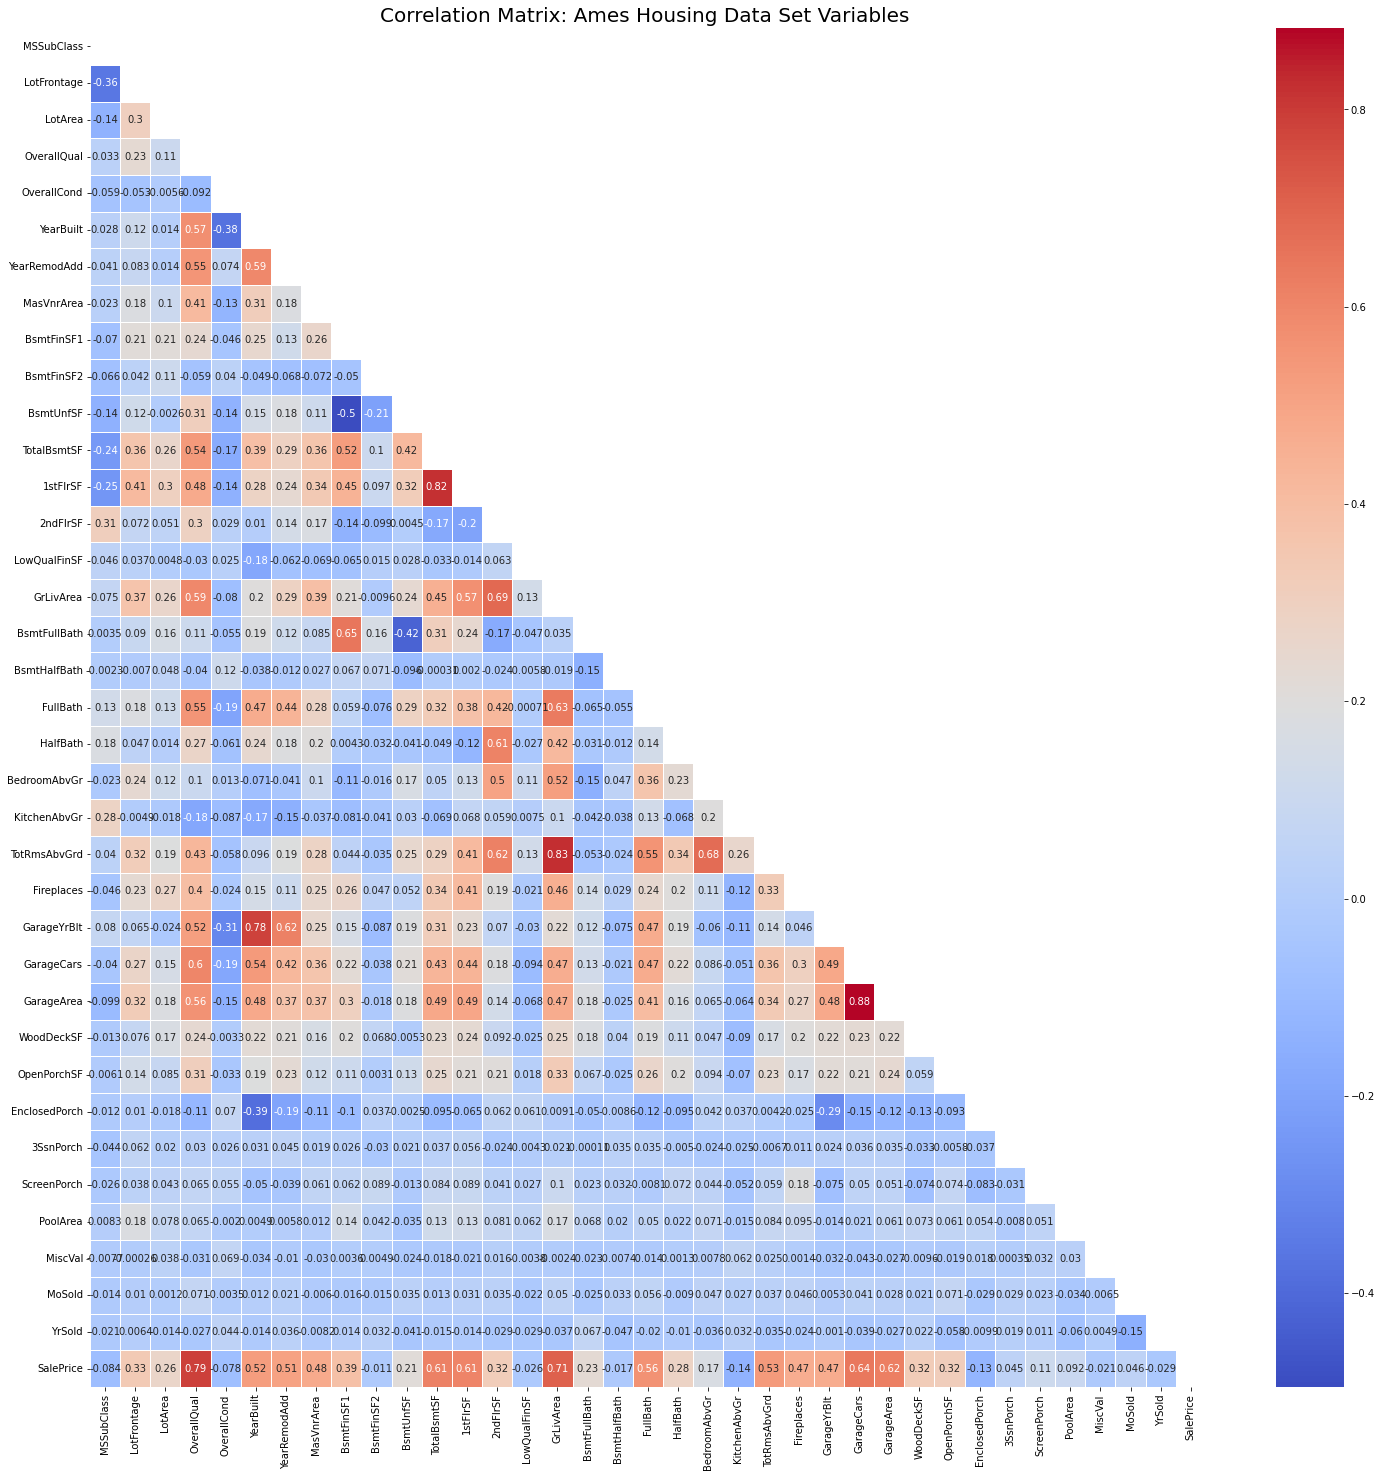

In [36]:
plt.figure(figsize = (25,25))
mask = np.triu(np.ones_like(df_train.corr(), dtype=bool))
sns.heatmap(df_train.corr(), annot = True,linewidths=1,mask = mask, cmap="coolwarm",)
plt.title('Correlation Matrix: Ames Housing Data Set Variables ', fontsize=20)

We can spot some high correlation values betwee : 
- GarageCars & Garage area, which can obvious, more area means more cars to park.
- GrLivArea and TotRmsAbvGrd, more ground area means more rooms.
- SalePrice and OverallQual, the finish of the house as well as the materials used effect the sale price a lot.
- SalePrice and GrLivArea, is a strong predictor as well.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

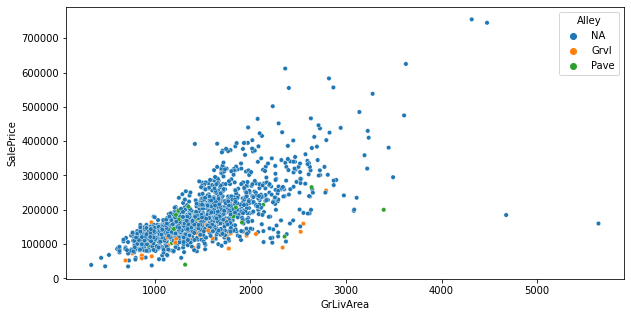

In [37]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice',hue="Alley",data = df_train, s = 20)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

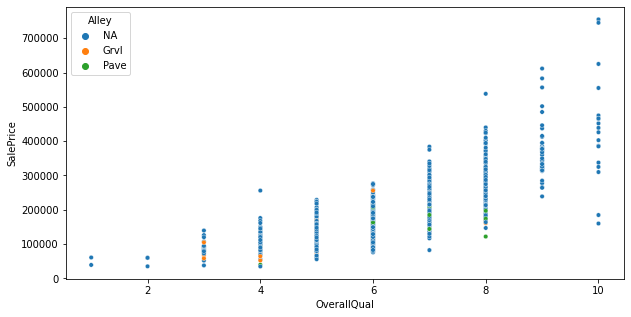

In [38]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'OverallQual', y = 'SalePrice',hue="Alley",data = df_train, s = 20)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

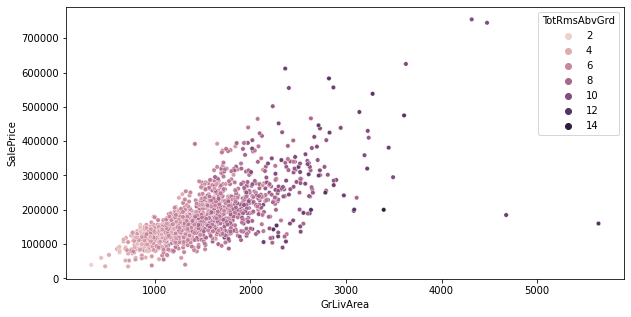

In [39]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice',hue="TotRmsAbvGrd",data = df_train, s = 20)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

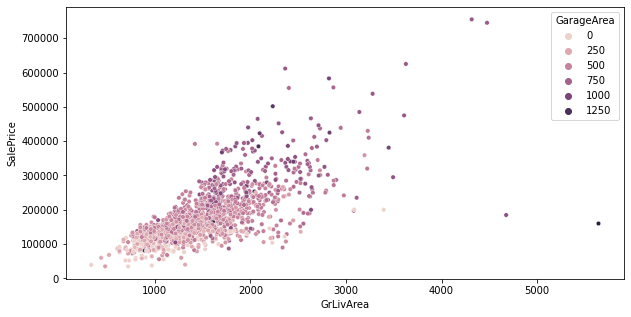

In [40]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice',hue="GarageArea",data = df_train, s = 20)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

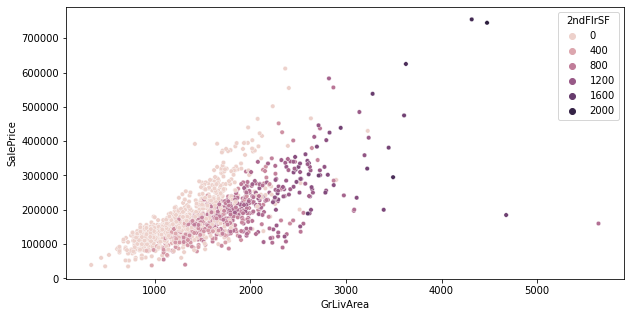

In [41]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'GrLivArea', y = 'SalePrice',hue="2ndFlrSF",data = df_train, s = 20)